# Quiz 2, estadísticos y visualizaciones

Contexto: 'Floating Pandas, Inc.' es una empresa tecnológica innovadora que ofrece una plataforma de meditación y bienestar personalizada. El servicio se basa en una suscripción mensual de $10.80, proporcionando acceso a una variedad de meditaciones guiadas, ejercicios de mindfulness y herramientas de gestión del estrés adaptadas a las necesidades individuales de los usuarios. Esta tarifa permite a la empresa mantener una calidad alta en el contenido ofrecido y asegurar la actualización constante de su plataforma.

'Floating Pandas, Inc.' ha observado variaciones en la retención de clientes y busca identificar factores clave que podrían estar influyendo en este aspecto. La empresa está interesada en entender que es lo que esta afectando la relación a largo plazo con ellos así como esto impacta en el LTV esperado de sus clientes a 2 años.

Datos disponibles: .

Actividad 1):

- Objetivo: Identificar y visualizar factores que afectan la retención de clientes.
- Actividad: Utiliza gráficos para explorar la relación entre el NPS, los segmentos de clientes, y su Lifespan. Investiga si hay patrones o tendencias claras.
- Recomendación: Basándote en tus hallazgos, propone acciones específicas que 'Floating Pandas, Inc.' podría implementar para mejorar la retención y aumentar el LTV esperado de sus clientes.

Actividad 2):

Dada tu previa recomendación, ahora 'Floating Pandas, Inc.' está revisando su estrategia de asignación de recursos de marketing para maximizar el retorno sobre la inversión en diferentes segmentos de clientes.

- Objetivo: Analizar y comparar la efectividad del gasto en marketing en diferentes segmentos de clientes.
- Tarea: Calcula y visualiza cómo varía el CAC y el LTV a través del tiempo por segmento. Identifica cuáles segmentos ofrecen el mayor retorno sobre la inversión y cuáles podrían estar sub-optimizados.
- Recomendación: Formula estrategias de realineación de la inversión en marketing basadas en los datos analizados para optimizar los retornos futuros.

## Act 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('customer_data.csv')
df.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259


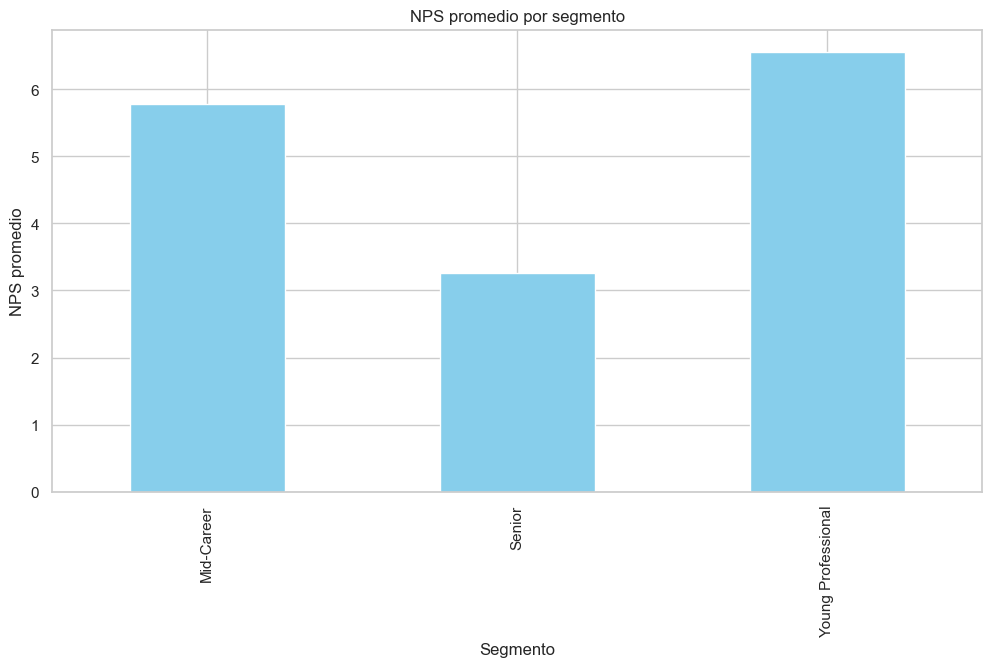

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
#Agrupamos los datos por día de la semana y calculamos la media de la factura total por día Creamos un gráfico de barras para visualizar la media de la factura total por día
df.groupby('Segment')['NPS_Score'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('NPS promedio por segmento')

# Etiquetamos el eje X
plt.xlabel('Segmento')

# Etiquetamos el eje Y
plt.ylabel('NPS promedio')

# Mostramos el gráfico
plt.show()

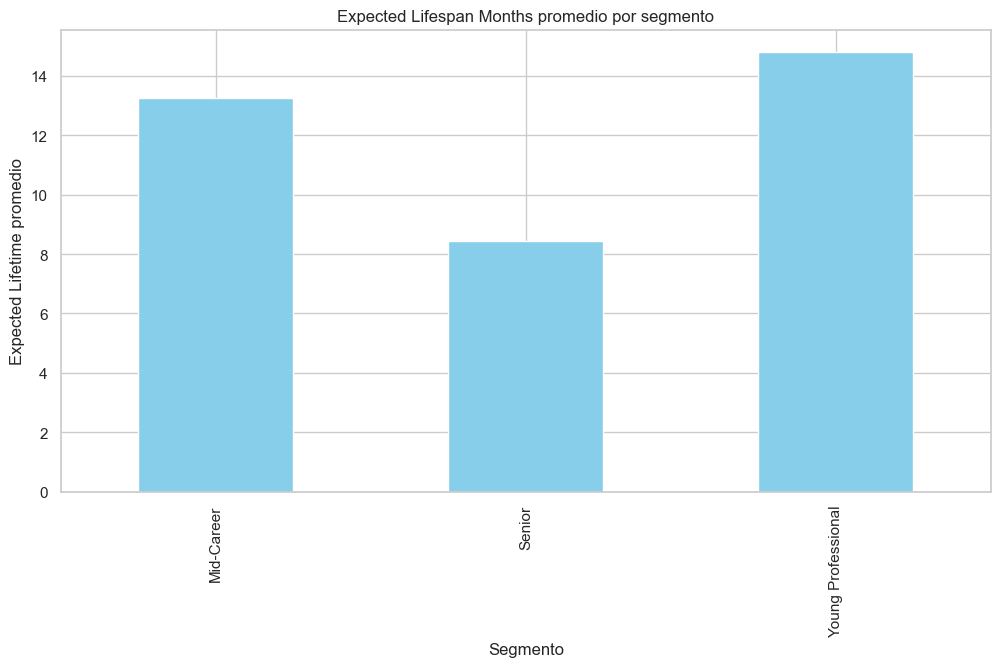

In [3]:
df.groupby('Segment')['Expected_Lifespan_Months'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('Expected Lifespan Months promedio por segmento')

# Etiquetamos el eje X
plt.xlabel('Segmento')

# Etiquetamos el eje Y
plt.ylabel('Expected Lifetime promedio')

# Mostramos el gráfico
plt.show()

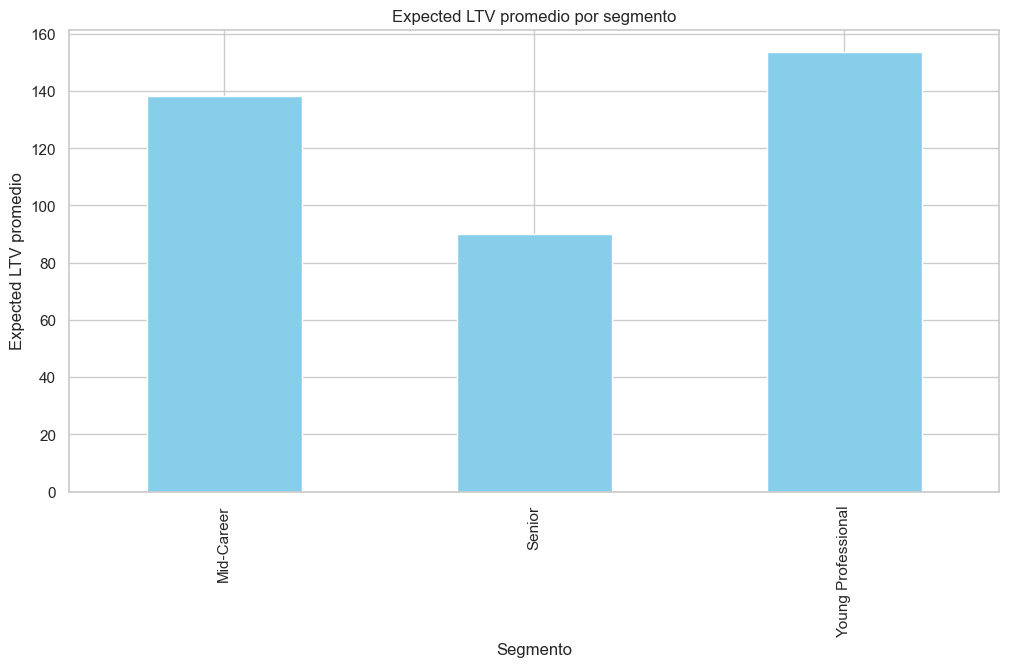

In [4]:
df.groupby('Segment')['Expected_LTV_in_Two_Years'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('Expected LTV promedio por segmento')

# Etiquetamos el eje X
plt.xlabel('Segmento')

# Etiquetamos el eje Y
plt.ylabel('Expected LTV promedio')

# Mostramos el gráfico
plt.show()

In [5]:
df[['Expected_LTV_in_Two_Years', 'Expected_Lifespan_Months']].corr()

,Expected_LTV_in_Two_Years,Expected_Lifespan_Months
Expected_LTV_in_Two_Years,1.000000,0.985697
Expected_Lifespan_Months,0.985697,1.000000


In [6]:
df['Segment'].value_counts()

Mid-Career            1279
Senior                 703
Young Professional     382
Name: Segment, dtype: int64

Tras haber analizado las gráficas vemos que el segmento que más le favorece a la empresa es el de Young Professional, ya que en promedio tienen el NPS más alto en promedio, son quienes retienen por más tiempo en promedio y tienen el mayor LTV en promedio, por lo que una buena estrategia para la empresa es enfocarse en ese segmento pues es quien más dinero genera y más conforme esta con la empresa. Además hacer en segundo lugar esfuerzos para el segemento de Mid-Career pues es el segundo mejor segemento para la empresa.

Estrategias útiles pueden ser enfocar el marketing un poco más hacia Young Professional como en redes sociales que utilizan bastante, y hacer un esfuerzo por ofrecer mejor servicio a ellos, que además en promedio llegan a recomendar a la empresa. También no olvidar al segmento Mid-Career pues también ofrece valor a la empresa ya que es segundo lugar en todas las gráficas por lo que también ofrecer cierto tipo de promociones a este segemnto puede ayudar a traer más y que esten más conformes en la empresa haciendo que usen los servicios más tiempo aumentando así lo que ke geenran a la empresa.

Con estas estrategias aumentamos la retención lo cual hace que por ser un cobro mensual el LTV de estos segemntos principales sea mayir generando más dinero.

## Act 2

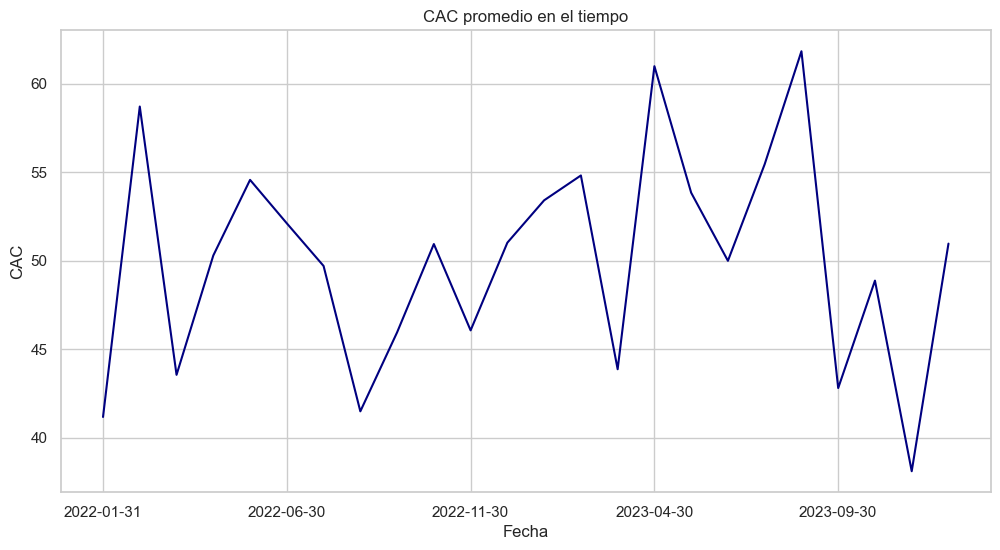

In [24]:
df.groupby('Acquisition_Month')['CAC'].mean().plot(kind='line', color='navy')

# Añadimos un título al gráfico
plt.title('CAC promedio en el tiempo')

# Etiquetamos el eje X
plt.xlabel('Fecha')

# Etiquetamos el eje Y
plt.ylabel('CAC')

# Mostramos el gráfico
plt.show()

In [25]:
df['ltv/cac'] = df.Expected_LTV_in_Two_Years/df.CAC
df.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years,ltv/cac
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0,0.000000
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54,1.311537
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237,5.756191
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162,3.934611
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259,6.290521


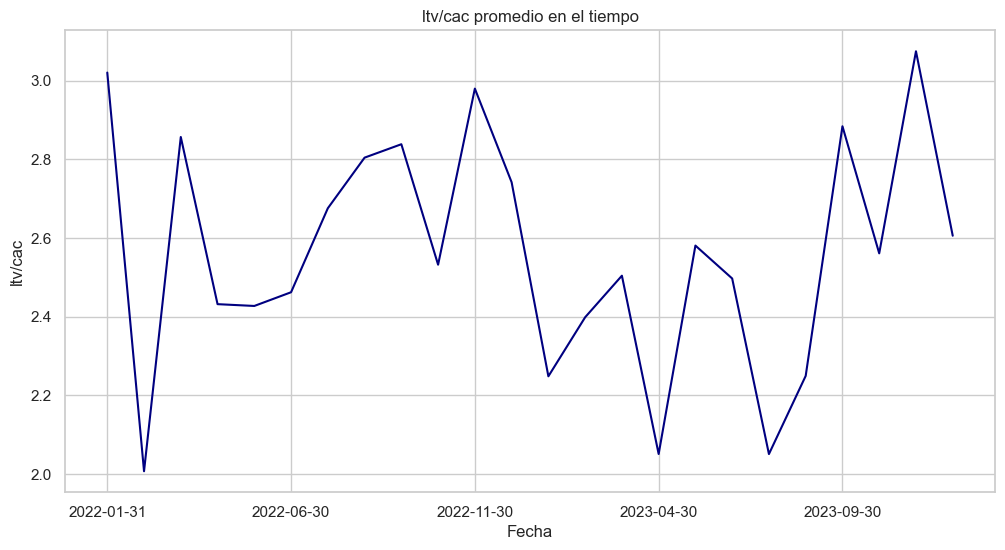

In [26]:
df.groupby('Acquisition_Month')['ltv/cac'].mean().plot(kind='line', color='navy')

# Añadimos un título al gráfico
plt.title('ltv/cac promedio en el tiempo')

# Etiquetamos el eje X
plt.xlabel('Fecha')

# Etiquetamos el eje Y
plt.ylabel('ltv/cac')

# Mostramos el gráfico
plt.show()

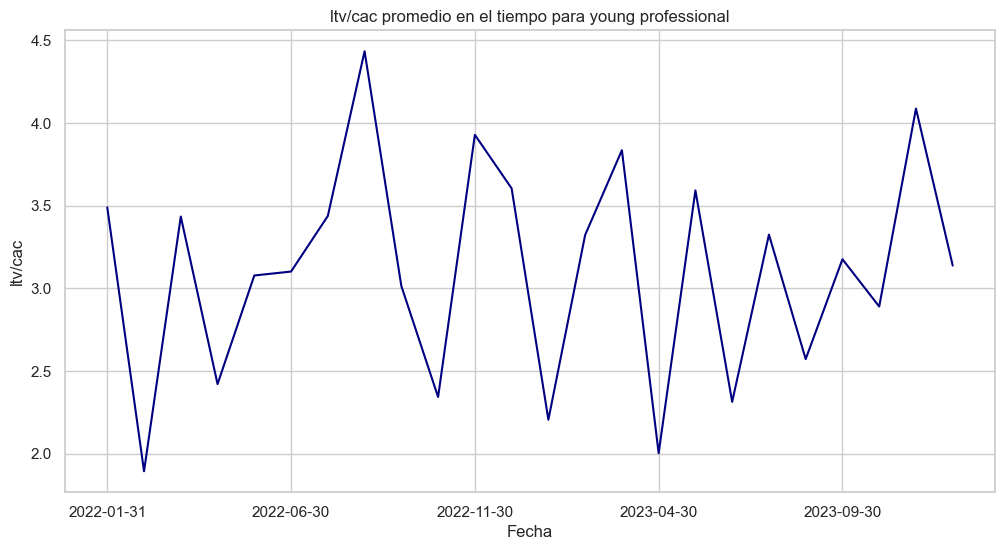

In [27]:
df_2 = df.query("Segment == 'Young Professional'")
df_2.groupby('Acquisition_Month')['ltv/cac'].mean().plot(kind='line', color='navy')

# Añadimos un título al gráfico
plt.title('ltv/cac promedio en el tiempo para young professional')

# Etiquetamos el eje X
plt.xlabel('Fecha')

# Etiquetamos el eje Y
plt.ylabel('ltv/cac')

# Mostramos el gráfico
plt.show()

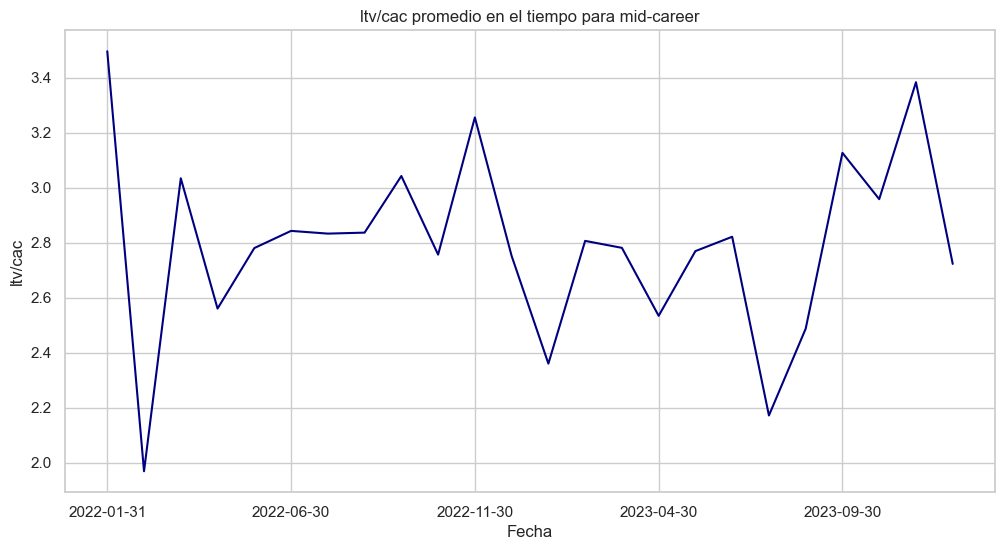

In [28]:
df_3 = df.query("Segment == 'Mid-Career'")
df_3.groupby('Acquisition_Month')['ltv/cac'].mean().plot(kind='line', color='navy')

# Añadimos un título al gráfico
plt.title('ltv/cac promedio en el tiempo para mid-career')

# Etiquetamos el eje X
plt.xlabel('Fecha')

# Etiquetamos el eje Y
plt.ylabel('ltv/cac')

# Mostramos el gráfico
plt.show()

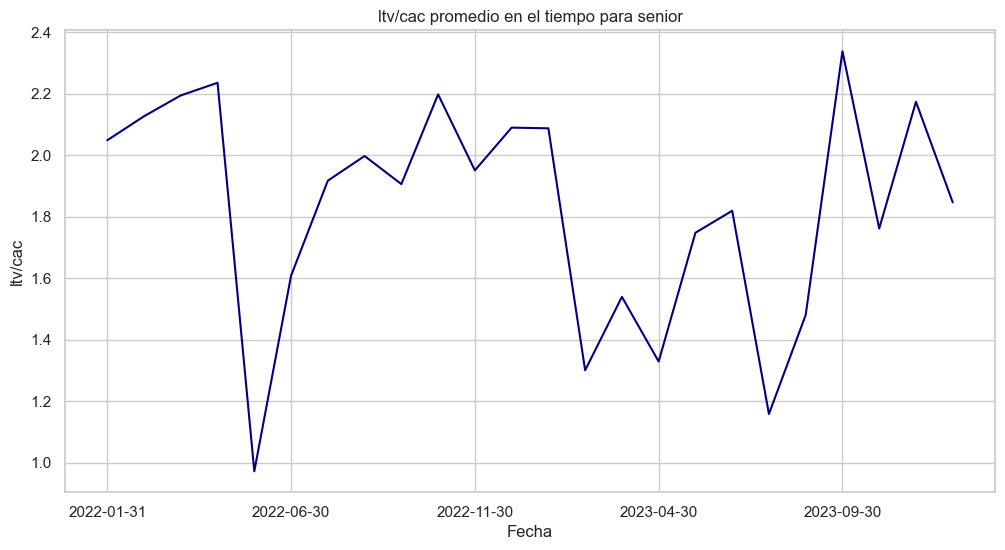

In [29]:
df_4 = df.query("Segment == 'Senior'")
df_4.groupby('Acquisition_Month')['ltv/cac'].mean().plot(kind='line', color='navy')

# Añadimos un título al gráfico
plt.title('ltv/cac promedio en el tiempo para senior')

# Etiquetamos el eje X
plt.xlabel('Fecha')

# Etiquetamos el eje Y
plt.ylabel('ltv/cac')

# Mostramos el gráfico
plt.show()

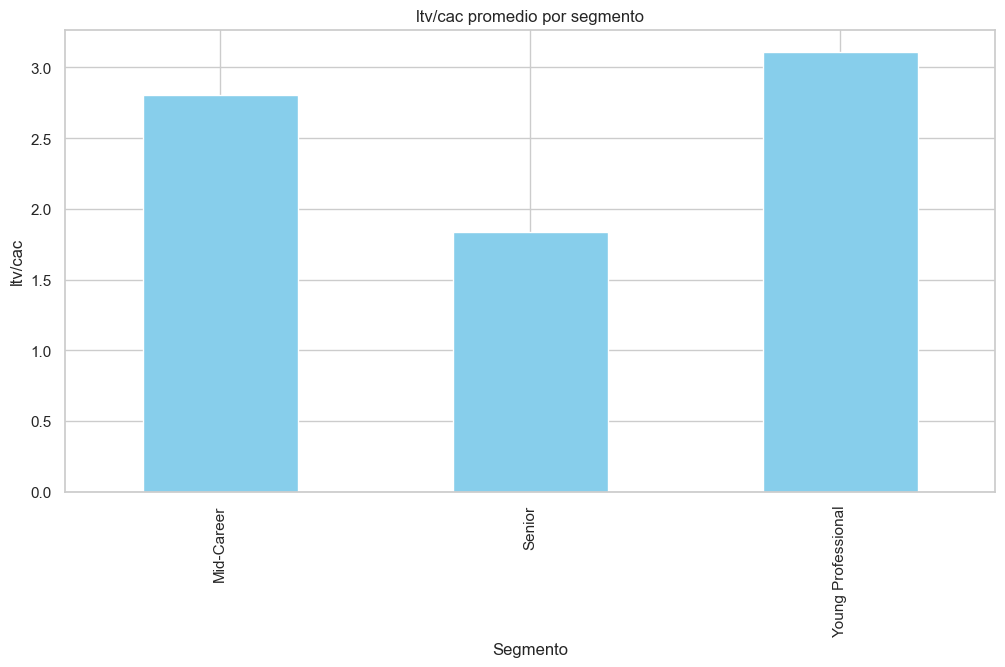

In [30]:
df.groupby('Segment')['ltv/cac'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('ltv/cac promedio por segmento')

# Etiquetamos el eje X
plt.xlabel('Segmento')

# Etiquetamos el eje Y
plt.ylabel('ltv/cac')

# Mostramos el gráfico
plt.show()

El ltv/cac de forma general va entre 2 y 3 por lo que se mantiene en un rango algo estable lo cual es bueno ya que es predecible hasta cierto punto, para la parte de young professional suele llegar incluso hasta a 4 por lo que ganan 4 veces lo que invierten por lo que la estrategia de marketing es útil que se enfoque a este segmento pues también en promedio tiene un ltv/cac mayor por lo que es más eficiente invertir esfueros de marketing aquí.

También el segemnto de Mid-Career tiene un buen ltv/cac y suele ser más estable por lo que con confianza se puede predecir y saber que es bueno y en promedio es mayor a 2.5 por lo que también hacer un buen marketing aquí es útil y podría atraer nuevos clientes de un segemnto rentable, por último no es necesario hacer esfuerzos para senior ya que en el tiempo el retorno es bajo y así se ha mantenido y en promedio es poco más de 1.5 siendo peor que los otros segmentos.

Por lo tanto enfocar el marketing a los young professional es la más eficiente y rentable y con el timepo se ha estabilizado por lo que es una buena decisión y no olvidar a mid-career pues ofrce buena rentabilidad y ha crecido un poco recientemente.